Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**Note**: This notebook was AI-generated and has not been fully verified. Please use caution when interpreting the code or results.

# Overview of the Dandiset
This notebook explores Dandiset **001174** (version **0.250331.2218**): [Calcium imaging in SMA and M1 of macaques](https://dandiarchive.org/dandiset/001174/0.250331.2218).  

We will:
- Load and inspect Dandiset metadata and assets  
- Choose an NWB file and examine its contents  
- Visualize raw imaging frames and ROI data  
- Summarize findings and suggest future directions  

# Required Packages
The following packages must be installed in your environment (no `pip install` commands here):

```python
import itertools
from itertools import islice
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dandi.dandiapi import DandiAPIClient
import pynwb, h5py, remfile
```

# Loading the Dandiset Metadata and Assets

In [1]:
import itertools
from itertools import islice
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dandi.dandiapi import DandiAPIClient
import pynwb, h5py, remfile

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")

# Print basic metadata
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the first 5 assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2)
- sub-Q/sub-Q_ophys.nwb (ID: de07db56-e7f3-4809-9972-755c51598e8d)
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (ID: ac161d0e-7642-48bd-9bef-8eff59319d48)
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3)
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea)


# Selecting and Loading an NWB File
We will load the file **`sub-Q/sub-Q_ophys.nwb`** (asset ID `de07db56-e7f3-4809-9972-755c51598e8d`).

In [2]:
# Construct the download URL
asset_id = "de07db56-e7f3-4809-9972-755c51598e8d"
url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"

# Stream and read the NWB file
remote_file = remfile.File(url)
h5file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5file)
nwb = io.read()

# Print basic NWB file info
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id} | Age: {nwb.subject.age} | Sex: {nwb.subject.sex}")

Session description: Calcium imaging in SMA during the spontaneous condition
Identifier: 5c2c4bb2-8310-4e0e-ae01-fd872edba928
Session start time: 2022-09-15 13:16:33.129000+00:00
Subject ID: Q | Age: P5Y | Sex: F


# NWB File Structure Summary
- **acquisition**
  - `OnePhotonSeries` (raw miniscope imaging data; shape 6041×320×200)  
- **processing**
  - **ophys**
    - `EventAmplitude` (RoiResponseSeries: 6041×40)  
    - `Fluorescence` (RoiResponseSeries: 6041×40)  
    - `ImageSegmentation` (PlaneSegmentation: 40 ROIs with masks)  
- **devices**, **imaging_planes**, **subject**

[View in NeuroSift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/&dandisetId=001174&dandisetVersion=draft)

# Visualizing a Single Imaging Frame
Load and display the first frame of the OnePhotonSeries.

Frame shape: (320, 200)


(-0.5, 199.5, 319.5, -0.5)

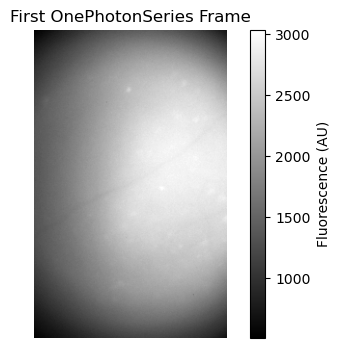

In [3]:
ops = nwb.acquisition["OnePhotonSeries"]
frame0 = ops.data[0, :, :]
print("Frame shape:", frame0.shape)

plt.figure(figsize=(6, 4))
plt.imshow(frame0, cmap="gray")
plt.colorbar(label="Fluorescence (AU)")
plt.title("First OnePhotonSeries Frame")
plt.axis("off")

# Plotting Event Amplitude Traces
Plot EventAmplitude for the first 5 ROIs over the first 100 timepoints.

Text(0.5, 1.0, 'EventAmplitude Traces for First 5 ROIs')

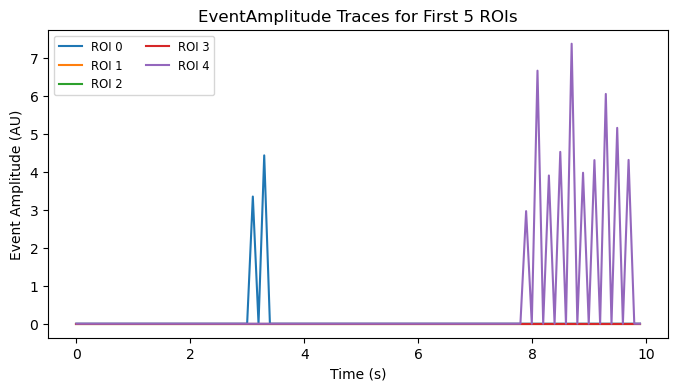

In [4]:
ea = nwb.processing["ophys"].data_interfaces["EventAmplitude"]
data = ea.data[:100, :5]  # 100 samples × 5 ROIs
time = np.arange(data.shape[0]) / ea.rate

plt.figure(figsize=(8, 4))
for roi_idx in range(data.shape[1]):
    plt.plot(time, data[:, roi_idx], label=f"ROI {roi_idx}")
plt.xlabel("Time (s)")
plt.ylabel("Event Amplitude (AU)")
plt.legend(ncol=2, fontsize="small")
plt.title("EventAmplitude Traces for First 5 ROIs")

# ROI Mask Maximum Projection
Compute and plot the maximum projection of all ROI masks to show spatial footprints.

(-0.5, 178.5, 291.5, -0.5)

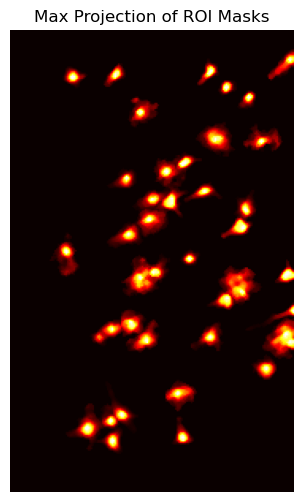

In [5]:
# Convert ROI table to DataFrame and stack masks
roi_df = ea.rois.table.to_dataframe()
masks = np.stack(roi_df["image_mask"].values)
mask_max = masks.max(axis=0)

plt.figure(figsize=(6, 6))
plt.imshow(mask_max, cmap="hot")
plt.title("Max Projection of ROI Masks")
plt.axis("off")

# Summary and Future Directions
This notebook demonstrates how to:
- Access and inspect Dandiset metadata and assets
- Stream NWB files remotely and explore file contents
- Extract and visualize raw imaging frames and ROI signals

**Future directions**:
- Background correction and ROI extraction workflows  
- Time-series analysis of fluorescence vs. behavior  
- Cross-plane or cross-session registration  
- Advanced event detection and co-activity analyses